In [2]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import cv2
from PIL import Image
from PIL import ImageDraw
#import imutils

## Making a self color pattern array satsifying all the properties

In [3]:
# Creating random numbers between 0-3
pattern_arr=np.zeros((10,10),dtype=np.uint64)

rand_nos=np.random.randint(4,size=9)
pattern_arr
 

array([[0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0, 0, 0, 0, 0]], dtype=uint64)

## Defining Circular Shift Invariance

In [4]:
count=0
def circshiftinvar(arr1,arr2):
    matched=False
    global no_of_matchings
    #for case of 9, same arr is returned after circular shifting for more than 7
    for i in range(len(arr1)-1): 
        firstColor=arr1[0] 
        tempArr=np.insert(np.roll(arr1[1:],i),0,arr1[0]) #circular wraping the coded array except for 0th index no
        if(np.array_equal(tempArr,arr2)):
            matched=True
            #print("Matched found! tempArr is",tempArr,"and Array 2 is",arr2)
            no_of_matchings+=1
            break
     

## Generating a unique random array

## Tell if this array is unique 

In [5]:
#old_arrs is a 2-D array containing 
old_arrays=[]
no_of_matchings=0
def tell_unique_array(random_arr,old_arrs):
    for Arr in old_arrs:
        circshiftinvar(Arr,random_arr)
    if no_of_matchings>0:
         return False #False if matched found and the grid is not unique and cannot be used
    else:
        return True
        
    

In [6]:
#Filling random numbers in the array and keep checking if circularshift invariance is being satisfied
tell_unique_array(np.random.randint(4,size=9),old_arrays)

True

## Self Pattern Generator 

In [7]:
old_arrays=[]
def self_pattern_gen(pattern_array):
    
    #input :a null array of required dimensions
    #output: a filled array with random numbers later giving a color pattern with properties satisfied
    #old_arrays=[]
    for i in range(1,pattern_array.shape[0]-1):
         for j in range(1,pattern_array.shape[1]-1):
            if(i==1):
                if(j==1):
                    new_arr=np.random.randint(4,size=9)
                    pattern_array[i-1:i+2,j+1]=new_arr[0:3]
                    pattern_array[i-1:i+2,j]=new_arr[3:6]
                    pattern_array[i-1:i+2,j-1]=new_arr[6:]

                    x2,x3,x4 = pattern_array[i-1:i+2,j+1]
                    x1,x0,x5 = pattern_array[i-1:i+2,j]
                    x8,x7,x6 = pattern_array[i-1:i+2,j-1]
                    old_arrays.append(np.array([x0,x1,x2,x3,x4,x5,x6,x7,x8]))
                else:
                    size=3
                    temp_arr=np.random.randint(4,size=3)
                    x1,x0,x5 = pattern_array[i-1:i+2,j]
                    x8,x7,x6 = pattern_array[i-1:i+2,j-1] #filling in rows with fixed cols(vertically)
                    x2,x3,x4 = temp_arr
                    random_array=np.array([x0,x1,x2,x3,x4,x5,x6,x7,x8],dtype=np.uint64)
                    while(tell_unique_array(random_array,old_arrays)!=True):
                        temp_arr=np.random.randint(4,size=3)
                        x2,x3,x4 = temp_arr
                        random_array=np.array([x0,x1,x2,x3,x4,x5,x6,x7,x8])
                    old_arrays.append(random_array)
                    pattern_array[i-1:i+2,j+1]=temp_arr    
                    #print(np.array(old_arrays))
            else:
                size=3
                temp_arr=np.random.randint(4,size=3)
                x8,x1,x2 = pattern_array[i-1,j-1:j+2] #filling in fixed rows horizontally
                x7,x0,x3 = pattern_array[i,j-1:j+2]
                x6,x5,x4 = temp_arr
                random_array=np.array([x0,x1,x2,x3,x4,x5,x6,x7,x8],dtype=np.uint64)

                while(tell_unique_array(random_array,old_arrays)!=True):
                    temp_arr=np.random.randint(4,size=3)
                    x6,x5,x4 = temp_arr
                    random_array=np.array([x0,x1,x2,x3,x4,x5,x6,x7,x8])
                old_arrays.append(random_array)
                pattern_array[i+1,j-1:j+2]=temp_arr
    return np.array(old_arrays),pattern_array

In [8]:
hello,my_patterns=self_pattern_gen(pattern_arr)

In [9]:
my_patterns

array([[1, 0, 0, 0, 2, 3, 2, 0, 1, 3],
       [0, 3, 3, 0, 1, 3, 1, 2, 1, 0],
       [1, 1, 2, 1, 3, 1, 3, 0, 3, 0],
       [0, 1, 0, 0, 1, 1, 0, 2, 0, 2],
       [3, 0, 2, 0, 2, 2, 2, 2, 2, 1],
       [2, 3, 1, 3, 3, 1, 3, 0, 2, 2],
       [0, 3, 3, 3, 1, 3, 1, 1, 3, 0],
       [3, 2, 1, 1, 1, 1, 2, 0, 0, 1],
       [0, 0, 2, 0, 1, 0, 0, 2, 2, 1],
       [1, 3, 3, 1, 3, 1, 0, 1, 1, 3]], dtype=uint64)

In [10]:
hello

array([[3, 0, 0, 3, 2, 1, 1, 0, 1],
       [3, 0, 0, 0, 1, 2, 1, 3, 0],
       [0, 0, 2, 1, 3, 1, 2, 3, 0],
       [1, 2, 3, 3, 1, 3, 1, 0, 0],
       [3, 3, 2, 1, 3, 1, 3, 1, 2],
       [1, 2, 0, 2, 0, 3, 1, 3, 3],
       [2, 0, 1, 1, 3, 0, 3, 1, 2],
       [1, 1, 3, 0, 0, 3, 0, 2, 0],
       [1, 3, 3, 2, 3, 2, 0, 1, 0],
       [2, 3, 0, 1, 2, 3, 1, 1, 3],
       [1, 0, 1, 3, 2, 0, 0, 2, 3],
       [3, 1, 3, 1, 0, 3, 0, 1, 0],
       [1, 3, 1, 3, 0, 0, 1, 3, 1],
       [3, 1, 2, 0, 2, 1, 1, 1, 3],
       [0, 2, 1, 3, 3, 2, 0, 3, 1],
       [3, 1, 0, 0, 2, 0, 2, 0, 2],
       [1, 1, 2, 0, 2, 3, 3, 0, 1],
       [0, 2, 1, 0, 2, 2, 0, 1, 1],
       [0, 1, 3, 1, 3, 0, 2, 0, 2],
       [1, 3, 1, 1, 1, 0, 0, 0, 1],
       [1, 1, 3, 0, 2, 3, 2, 1, 3],
       [0, 3, 0, 2, 1, 3, 2, 1, 1],
       [2, 0, 3, 0, 2, 0, 2, 0, 3],
       [0, 3, 0, 2, 1, 2, 2, 2, 0],
       [0, 1, 0, 2, 1, 1, 2, 3, 0],
       [2, 0, 0, 0, 3, 3, 3, 0, 1],
       [0, 0, 1, 2, 0, 2, 1, 2, 0],
       [2, 1, 1, 2, 0, 0, 3,

## Checking If the Generated array Holds Circular Shift Invariance

In [11]:
no_of_matchings=0
for Arr in hello:
        for index,j in enumerate(hello):
            circshiftinvar(hello[index],Arr)
            
print(no_of_matchings)

64


## Generating a patterned Image from Self Patterns

In [12]:
my_patterns

array([[1, 0, 0, 0, 2, 3, 2, 0, 1, 3],
       [0, 3, 3, 0, 1, 3, 1, 2, 1, 0],
       [1, 1, 2, 1, 3, 1, 3, 0, 3, 0],
       [0, 1, 0, 0, 1, 1, 0, 2, 0, 2],
       [3, 0, 2, 0, 2, 2, 2, 2, 2, 1],
       [2, 3, 1, 3, 3, 1, 3, 0, 2, 2],
       [0, 3, 3, 3, 1, 3, 1, 1, 3, 0],
       [3, 2, 1, 1, 1, 1, 2, 0, 0, 1],
       [0, 0, 2, 0, 1, 0, 0, 2, 2, 1],
       [1, 3, 3, 1, 3, 1, 0, 1, 1, 3]], dtype=uint64)

In [13]:
selfimage = Image.new(size=(400,400),mode='RGB')
selfimg_arr=np.array(selfimage)

## Drawing A Circle

In [14]:
def draw_a_circ(img,r,x,y,fillclr):
    draw = ImageDraw.Draw(img)
    leftUpPoint = (x-r, y-r)
    rightDownPoint = (x+r, y+r)
    twoPointList = [leftUpPoint, rightDownPoint]
    draw.ellipse(twoPointList, fill=fillclr)

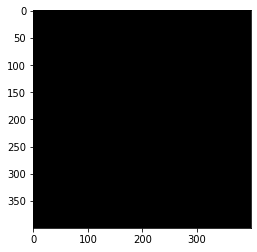

In [15]:
plt.imshow(selfimage)

## Return a Color

In [16]:
red = (255,0,0) #0
blue = (0,0,255)#3
green = (0,255,0)#2
yellow = (255,255,0)#1
black = (0,0,0) #4

def return_a_clr(number):
    if(number==0):
        return red
    elif(number==1):
        return yellow
    elif(number==2):
        return green
    elif(number==3):
        return blue
    elif(number==4):
        return black

In [17]:
return_a_clr(0)

(255, 0, 0)

## Drawing Circles on Image

In [18]:
def generate_a_pattern_img(Img,radius,fixed_spacing,my_patterns):
    img_arr=np.array(Img)
    height=img_arr.shape[0]
    width=img_arr.shape[1]
    inter_spacing_x=np.int((width- 1*fixed_spacing)/my_patterns.shape[1])
    inter_spacing_y=np.int((height - 1*fixed_spacing)/my_patterns.shape[0])

    for i in range(my_patterns.shape[0]):
        for j in range(my_patterns.shape[1]):
            draw_a_circ(Img,radius,(fixed_spacing+ j*inter_spacing_x),(fixed_spacing+ i*inter_spacing_y),return_a_clr(my_patterns[i,j]))

           

In [19]:
selfimage = Image.new(size=(400,400),mode='RGB')
selfimg_arr=np.array(selfimage)
generate_a_pattern_img(selfimage,radius=12,fixed_spacing=25,my_patterns=my_patterns)

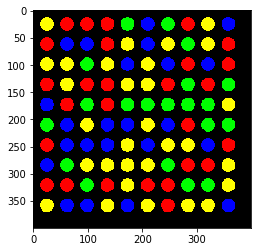

In [20]:
plt.imshow(selfimage)
selfimage.save('withoutshiftpattern.png')

## Finding Total No of Combination for such dots 


In [21]:
total_combs=[] ## 2-D array list containing all possible patterns (1-D array)
first_run=True
x0,x1,x2,x3,x4,x5,x6,x7,x8=0,0,0,0,0,0,0,0,0
total_comb_count=0
no_of_matchings=0
while(True):
    if(first_run):
        new_arr=np.random.randint(4,size=9)
        x2,x3,x4 = new_arr[0:3] 
        x1,x0,x5 = new_arr[3:6]
        x8,x7,x6 = new_arr[6:]
        total_combs.append(np.array([x0,x1,x2,x3,x4,x5,x6,x7,x8]))
        total_comb_count+=1
        print(total_comb_count)
        first_run=False
    else:
        temp_arr=np.random.randint(4,size=3)
        x8,x7,x6 = x1,x0,x5 #filling in rows with fixed cols(vertically)
        x1,x0,x5 = x2,x3,x4 
        x2,x3,x4 = temp_arr
        random_array=np.array([x0,x1,x2,x3,x4,x5,x6,x7,x8],dtype=np.uint64)
        #print(random_array)
        #print(np.array(total_combs))
        while(tell_unique_array(random_array,np.array(total_combs))!=True):
            #print('while loop')
            temp_arr=np.random.randint(4,size=3)
            x2,x3,x4 = temp_arr
            random_array=np.array([x0,x1,x2,x3,x4,x5,x6,x7,x8],dtype=np.uint64)
            no_of_matchings=0
            #print(random_array)
        total_combs.append(random_array)
        total_comb_count+=1
        print(total_comb_count)
        

1
2
3
4
5
6
7
8
9
10
11
12
13
14
15
16
17
18
19
20
21
22
23
24
25
26
27
28
29
30
31
32
33
34
35
36
37
38
39
40
41
42
43
44
45
46
47
48
49
50
51
52
53
54
55
56
57
58
59
60
61
62
63
64
65
66
67
68
69
70
71
72
73
74
75
76
77
78
79
80
81
82
83
84
85
86
87
88
89
90
91
92
93
94
95
96
97
98
99
100
101
102
103
104
105
106
107
108
109
110
111
112
113
114
115
116
117
118
119
120
121
122
123
124
125
126
127
128
129
130
131
132
133
134
135
136
137
138
139
140
141
142
143
144
145
146
147
148
149
150
151
152
153
154
155
156
157
158
159
160
161
162
163
164
165
166
167
168
169
170
171
172
173
174
175
176
177
178
179
180
181
182
183
184
185
186
187
188
189
190
191
192
193
194
195
196
197
198
199
200
201
202
203
204
205
206
207
208
209
210
211
212
213
214
215
216
217
218
219
220
221
222
223
224
225
226
227
228
229
230
231
232
233
234
235
236
237
238
239
240
241
242
243
244
245
246
247
248
249
250
251
252
253
254
255
256
257
258
259
260
261
262
263
264
265
266
267
268
269
270
271
272
273
274
275
276
277


KeyboardInterrupt: 

In [ ]:
# no_of_matchings=0
# for j in range(1,new_pattern.shape[1]-1):
#     #print(j)
#     temp_arr=np.random.randint(4,size=3)
#     x8,x1,x2 = new_pattern[7,j-1:j+2] #filling in fixed rows horizontally
#     x7,x0,x3 = new_pattern[8,j-1:j+2]
#     x6,x5,x4 = temp_arr
#     random_array=np.array([x0,x1,x2,x3,x4,x5,x6,x7,x8],dtype=np.uint64)
#     #print(random_array)
#     while(tell_unique_array(random_array,hello)!=True):
#         temp_arr=np.random.randint(4,size=3)
#         x6,x5,x4 = temp_arr
#         random_array=np.array([x0,x1,x2,x3,x4,x5,x6,x7,x8])
#         #print(random_array)
#         #print('im stuck')
#     hello.tolist().append(random_array)
#     new_pattern[9,j-1:j+2]=temp_arr

In [ ]:
# new_pattern[0:9]=my_patterns[1:10]
# new_pattern

In [ ]:
# selfimage_shifted = Image.new(size=(400,400),mode='RGB')
# selfimg_arr_shifted=np.array(selfimage)
# generate_a_pattern_img(selfimage_shifted,radius=12,fixed_spacing=25,my_patterns=new_pattern)
# selfimage_shifted.save('shiftedpattern.png')
# plt.subplot(121)
# plt.imshow(selfimage)
# plt.subplot(122)
# plt.imshow(selfimage_shifted)